乐学偶得 版权所有 主讲人 ：William 由LX_LAB教研团队提供技术支持 乐学偶得版权所有  公众号：乐学Fintech  正版视频课程 网易云课堂：乐学偶得 

In [1]:
import cv2

In [2]:
print(cv2.__version__)

3.4.1


【影像直方图】：回忆单反，手机照片里的“分析图”，水平轴代表的是其亮度，而其垂直轴代表的是该亮度所累积的像素数量，左边的区域代表的是较暗的部分，右边的区域则代表较亮的部分

In [3]:
import matplotlib.pyplot as plt
import cv2

im = cv2.imread('japan.jpg')
vals = im.mean(axis=2).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

<Figure size 640x480 with 1 Axes>

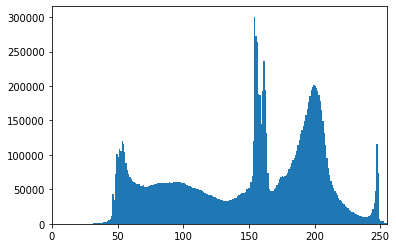

In [4]:
im = cv2.imread('japan_B.jpg')
vals = im.mean(axis=2).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

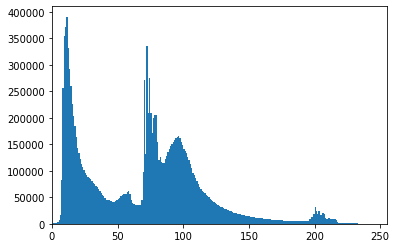

In [5]:
im = cv2.imread('japan_D.jpg')
vals = im.mean(axis=2).flatten()
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

【噪点】图片，本质上就是一系列数据，这些数据是通过各种传感器产生的，额外信息或者错误信息
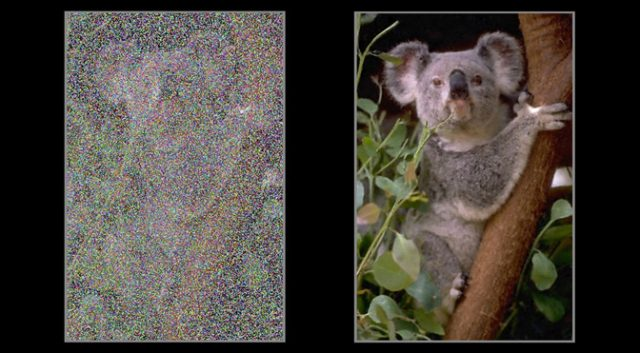

假设有真正的像素值（pixel value）$I(x,y)$ <br>
假设在pixel$I(x,y)$里有噪点：$n(x,y)$<br>
有$\hat{I}(x,y)=I(x,y)+n(x,y)$

介绍一种去噪原理【利用高斯分布去噪】：

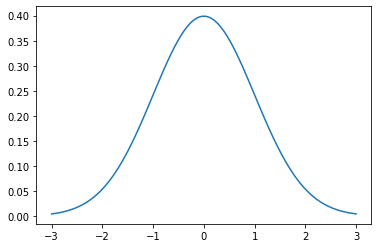

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
import math

mu = 0
variance= 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*sigma, mu+3* sigma,100)
plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.show()

中心极限定理（Central Limit Theorem）,因为通常情况下，噪声（noise）的来源独立且随机，所以我们不管每一个噪声是什么分布的，最终的分布趋于正态分布。

$ Sum = \sum_{i=1}^n N_i $

Derivative(导数)：
1.速度——距离的变化率
2.加速度——速度的变化率

Discrete Derivative

$\frac{\partial f}{\partial x}= \lim_{\Delta x \to 0} \frac{f(x)-f(x-\Delta x)}{\Delta x}= f'(x) $

$\frac{\partial f}{\partial x}=\frac{f(x)-f(x-1)}{1}= f'(x) $

Backward Difference$\frac{\partial f}{\partial x}= f(x)-f(x-1)= f'(x) $

Forward Difference$\frac{\partial f}{\partial x}= f(x)-f(x+1)= f'(x) $

Central Difference$\frac{\partial f}{\partial x}= f(x+1)-f(x-1)= f'(x) $

Derivative 【Masks】<br>
以下计算的是backward difference:<br>
$f(x)= 10\;15\;10\;10\;25\;20\;20\;20$<br>
$f'(x)=0\;5\;-5\;0\;15\;-5\;0\;0$<br>
$f''(x)=0\;5\;-10\;5\;15\;-20\;5\;0$

-10+15联想到矩阵运算

Backward difference [-1 1]<br>
Forward Difference [1 -1]<br>
Central Difference [-1 0 1] 


$f_x ----->\frac{1}{3}\begin{bmatrix}
-1\;0\;1\\
-1\;0\;1\\
-1\;0\;1\\
\end{bmatrix}$<br>
$f_y ----->\frac{1}{3}\begin{bmatrix}
1\;1\;1\\
0\;0\;0\\
-1\;-1\;-1\\
\end{bmatrix}$

已知矩阵$I = \begin{bmatrix}
10\;10\;20\;20\;20\\
10\;10\;20\;20\;20\\
10\;10\;20\;20\;20\\
10\;10\;20\;20\;20\\
10\;10\;20\;20\;20\\
\end{bmatrix}$ 求$I_x,I_y$

$I_x = \begin{bmatrix}
0\;0\;0\;0\;0\\
0\;10\;10\;0\;0\\
0\;10\;10\;0\;0\\
0\;10\;10\;0\;0\\
0\;0\;0\;0\;0\\
\end{bmatrix}$<br>
$I_y = \begin{bmatrix}
0\;0\;0\;0\;0\\
0\;0\;0\;0\;0\\
0\;0\;0\;0\;0\\
0\;0\;0\;0\;0\\
0\;0\;0\;0\;0\\
\end{bmatrix}$

1)Correlation

f= Image
h= Kernel

$f*h = \sum\limits_{k}\sum\limits_{l}f(k,l)h(i+k,j+l)$

$f = \begin{bmatrix}
f_1\;f_2\;f_3\\
f_4\;f_5\;f_6\\
f_7\;f_8\;f_9\\
\end{bmatrix}$<br>
$h= \begin{bmatrix}
h_1\;h_2\;h_3\\
h_4\;h_5\;h_6\\
h_7\;h_8\;h_9\\
\end{bmatrix}$

$f*h= f_1h_1+f_2h_2+f_3h_3+f_4h_4+f_5h_5+f_6h_6+f_7h_7+f_8h_8+f_9h_9$

2)Convolution(关键在于flip)<br>
f= Image
h= Kernel

$f*h = \sum\limits_{k}\sum\limits_{l}f(k,l)h(i-k,j-l)$

$f = \begin{bmatrix}
f_1\;f_2\;f_3\\
f_4\;f_5\;f_6\\
f_7\;f_8\;f_9\\
\end{bmatrix}$<br>

$h= \begin{bmatrix}
h_1\;h_2\;h_3\\
h_4\;h_5\;h_6\\
h_7\;h_8\;h_9\\
\end{bmatrix}$

第一次翻转（X-flip）

$h= \begin{bmatrix}
h_7\;h_8\;h_9\\
h_4\;h_5\;h_6\\
h_1\;h_2\;h_3\\
\end{bmatrix}$

第二次翻转（Y-flip）<br>
$h= \begin{bmatrix}
h_9\;h_8\;h_7\\
h_6\;h_5\;h_4\\
h_3\;h_2\;h_1\\
\end{bmatrix}$<br>



$f = \begin{bmatrix}
f_1\;f_2\;f_3\\
f_4\;f_5\;f_6\\
f_7\;f_8\;f_9\\
\end{bmatrix}$<br>

$f*h= f_1h_9+f_2h_8+f_3h_8+f_4h_6+f_5h_5+f_6h_4+f_7h_3+f_8h_2+f_9h_1$

mean(求平均)：
$I = \frac{I_1+I_2+......+I_n}{n}$<br>
weighted mean(加权平均):
$I= \frac{w_1I_1+w_2I_2+......+w_nI_n}{n}$

Gaussian Filter:

$g(x) = e^\frac{-x^2}{2\sigma ^2}$<br>
$g(x,y) = e^\frac{-(x^2+y^2)}{2\sigma ^2}$

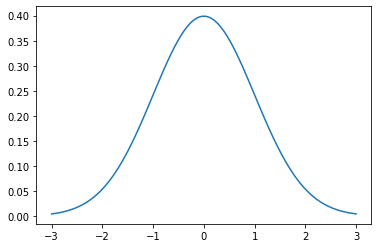

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0 
variance = 1

sigma = math.sqrt(variance)
x =np.linspace(mu -3*sigma, mu +3*sigma,100)
plt.plot(x, stats.norm.pdf(x,mu,sigma))
plt.show()

<IPython.core.display.Javascript object>


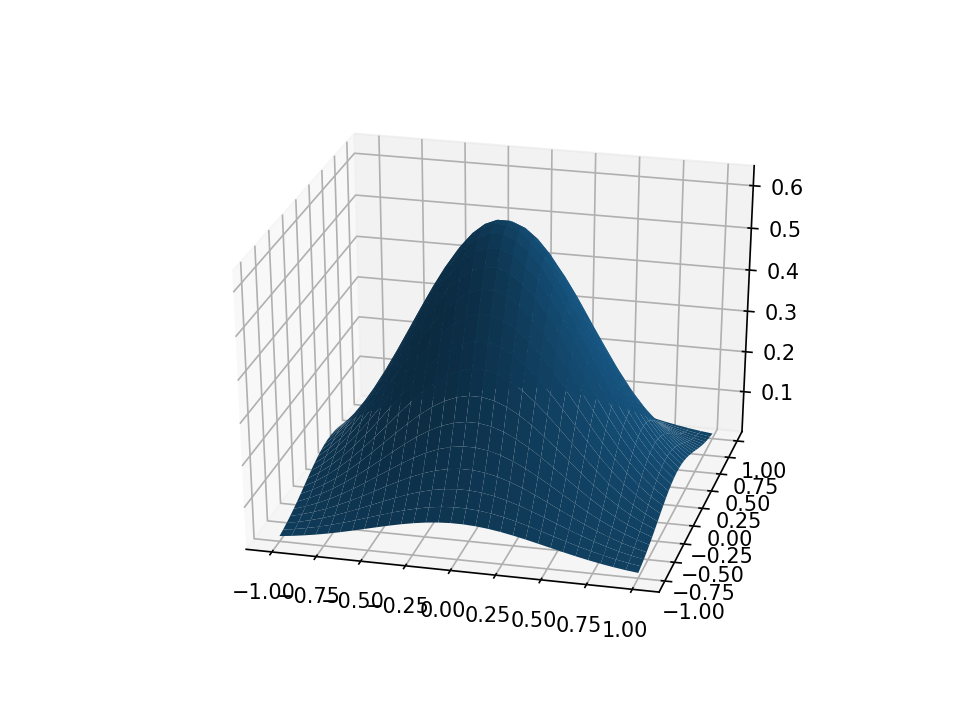

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal


x, y = np.mgrid[-1.0:1.0:30j,-1.0:1.0:30j]

xy = np.column_stack([x.flat,y.flat])

mu = np.array([0.0,0.0])
sigma=np.array([.5,.5])
covariance = np.diag(sigma**2)


z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

z = z.reshape(x.shape)

fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")

ax.plot_surface(x,y,z)
# ax.plot_wireframe(x,y,z)

plt.show()


Gaussian Model的特点：
1.非常常见的Natural Model，平滑（Smooth）的函数，有无穷的derivative
2.Fourier Transformation and Convolution of Gaussian is still Gausian 
3.*动物眼睛中有部分细胞也在进行Gaussian Filtering